In [1]:
#Importing the require packages to analyze the data
import pandas as pd #To to preprocess the data
import numpy as np #For Mathematical claculations and numpy arrays
import matplotlib.pyplot as plt #For Visualzing the data
import seaborn as sb #For Visualzing the data
import math #For Mathematical claculations
import requests
import random as rd

In [2]:
# Inspired form the kaggle website (https://www.kaggle.com/code/preetishasrivastava/boston-house-price-eda-and-prediction/notebook)
#Function to outline the outliers in the each feature
def find_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Percentage of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Percentage of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]*100/len(df)},ignore_index=True)
            row_index = df.index[(df[column] < fence_low)| (df[column] > fence_high)]
            
    return outliers, row_index

In [3]:
#Function to find the n_neighbors value with highest accuracy
def find_n_neighbors_value_with_highest_accuracy(london6):
    acc = []
    #Defining the predictor(independent) varibles
    X1= london6.loc[:, london6.columns != "price_range"]
    #Defining the Responce(dependent) varibles
    Y1= london6['price_range']
    
    # Split into training and test  
    X_train, X_test, y_train, y_test = train_test_split( 
                 X1, Y1, test_size = 0.2, random_state=1) 

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Finding the accuracy for diffent values of K from 2 to 50 
    for k in range(2,51):
        #KNN Classifier
        # Training the K-NN model on the Training set
        classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = classifier.predict(X_test)

        # Model Accuracy, how often is the classifier correct?
        ac = metrics.accuracy_score(y_test, y_pred)
        acc.append(ac)
    #Finding the maximum accuracy with different K-values
    max_value = max(acc)
    #finding the index of the maximum value
    max_index = acc.index(max_value)
    n_neighbors_value = max_index+2
    Highest_accuracy = max_value
    return n_neighbors_value, Highest_accuracy   

In [4]:
def find_random_forest_classifier_model_Accuracy(london7, Colname = "price_range"):
    #Predictiing the price with random forest classification
    X = london7.loc[:, london7.columns != Colname]  # Features
    y = london7[Colname]  # Labels
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
    # Instantiate model with 100 decision trees
    rf0 = RandomForestClassifier(n_estimators = 100, random_state = 42)
    # Train the model on training data
    rf0.fit(X_train, y_train);
    y_pred = rf0.predict (X_test)
    Accuracy = metrics.accuracy_score(y_test, y_pred)
    return rf0, Accuracy

In [5]:
#Loading the data into london dataframe
london = pd.read_csv("/Users/payyavula/Downloads/london_listings.csv")
london.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,accommodates,bedrooms,beds,availability_30
0,36299.0,Kew Gardens 3BR house in cul-de-sac,155938,Geert,Richmond upon Thames,51.48085,-0.28086,Entire home/apt,195,3,...,3/7/2022,0.64,1,233,10,NaN,5.0,3.0,3.0,0.0
1,15400.0,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,...,3/16/2020,0.60,1,9,0,NaN,2.0,1.0,1.0,0.0
2,17402.0,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,307,4,...,1/17/2022,0.34,1,213,3,NaN,4.0,1.0,1.0,9.0
3,36660.0,You are GUARANTEED to love this,157884,Agri & Roger,Haringey,51.58478,-0.16057,Private room,72,2,...,3/1/2022,3.93,2,236,22,NaN,2.0,1.0,1.0,0.0
4,17506.0,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,...,NaN,NaN,2,364,0,NaN,2.0,1.0,1.0,2.0


In [6]:
london.info() #Understanding the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66640 entries, 0 to 66639
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              66640 non-null  float64
 1   name                            66616 non-null  object 
 2   host_id                         66640 non-null  int64  
 3   host_name                       66608 non-null  object 
 4   neighbourhood                   66640 non-null  object 
 5   latitude                        66640 non-null  float64
 6   longitude                       66640 non-null  float64
 7   room_type                       66640 non-null  object 
 8   price                           66640 non-null  int64  
 9   minimum_nights                  66640 non-null  int64  
 10  number_of_reviews               66640 non-null  int64  
 11  last_review                     48300 non-null  object 
 12  reviews_per_month               

In [7]:
london.isnull().sum()* 100 / len(london) #Checking the null values 

id                                  0.000000
name                                0.036014
host_id                             0.000000
host_name                           0.048019
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        27.521008
reviews_per_month                  27.521008
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
accommodates                        0.012005
bedrooms                            5.714286
beds                                2.405462
availability_30                     0.012005
dtype: float64

In [8]:
#dropping non-important and blank columns
london1 = london
london1.drop(['id',"name", "host_id", 'host_name','last_review','license',], axis=1, inplace=True)
london1.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,beds,availability_30
0,Richmond upon Thames,51.48085,-0.28086,Entire home/apt,195,3,89,0.64,1,233,10,5.0,3.0,3.0,0.0
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,0.60,1,9,0,2.0,1.0,1.0,0.0
2,Westminster,51.52195,-0.14094,Entire home/apt,307,4,45,0.34,1,213,3,4.0,1.0,1.0,9.0
3,Haringey,51.58478,-0.16057,Private room,72,2,550,3.93,2,236,22,2.0,1.0,1.0,0.0
4,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,2,364,0,2.0,1.0,1.0,2.0


In [9]:
#listing the categorical varibles for for loop to impute the mode
Cgt_cols_with_null_values = ['accommodates','bedrooms','beds','availability_30']

In [10]:
# Inspired from codegrepper website (https://www.codegrepper.com/code-examples/python/impute+missing+values+with+mode+in+python)
#For loop to impute the null values with mode and median
for column in london1:
    if london1[column].isnull().any():
        if(column in Cgt_cols_with_null_values):
            london1[column]=london1[column].fillna(london1[column].mode()[0])
        else:
            london1[column]=london1[column].fillna(london1[column].median())

In [11]:
#Checking the null values after imputing
london1.isnull().sum()* 100 / len(london)

neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
accommodates                      0.0
bedrooms                          0.0
beds                              0.0
availability_30                   0.0
dtype: float64

In [12]:
#Describing the data
london1.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,beds,availability_30
count,66640.000000,66640.000000,66640.000000,66640.000000,66640.000000,66640.000000,66640.00000,66640.000000,66640.000000,66640.000000,66640.000000,66640.000000,66640.000000
mean,51.509548,-0.128030,145.303316,6.887275,16.035264,0.522277,24.09913,100.488986,2.637740,3.030447,1.467662,1.740216,6.363220
std,0.048511,0.098669,344.425360,31.129344,37.702634,0.883789,106.27137,131.811969,9.200084,1.939716,0.867022,1.266643,10.183618
min,51.290570,-0.510650,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,51.482957,-0.189003,49.000000,1.000000,0.000000,0.150000,1.00000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,51.513660,-0.125150,85.000000,2.000000,3.000000,0.290000,1.00000,13.000000,0.000000,2.000000,1.000000,1.000000,0.000000
75%,51.539803,-0.068657,150.000000,4.000000,14.000000,0.530000,4.00000,190.000000,2.000000,4.000000,2.000000,2.000000,10.000000
max,51.685220,0.288570,18679.000000,1125.000000,1056.000000,64.900000,845.00000,365.000000,729.000000,16.000000,22.000000,60.000000,30.000000


In [13]:
#Checking the percentage of zeros in the each feature
for column_name in london1:
    # Get the count of Zeros in column 
    perc = round(((london1[column_name] == 0).sum())*100/len(london1), 3)
    print(column_name, ': ', perc) 

neighbourhood :  0.0
latitude :  0.0
longitude :  0.002
room_type :  0.0
price :  0.032
minimum_nights :  0.0
number_of_reviews :  27.521
reviews_per_month :  0.0
calculated_host_listings_count :  0.0
availability_365 :  46.208
number_of_reviews_ltm :  66.594
accommodates :  0.014
bedrooms :  0.0
beds :  0.0
availability_30 :  61.08


In [14]:
london1.drop(['availability_30',"number_of_reviews_ltm"], axis=1, inplace=True)

In [15]:
#Copying the data into new varible
london2 = london1.copy()

In [16]:
#Understanding the features after cleaning
london2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66640 entries, 0 to 66639
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   66640 non-null  object 
 1   latitude                        66640 non-null  float64
 2   longitude                       66640 non-null  float64
 3   room_type                       66640 non-null  object 
 4   price                           66640 non-null  int64  
 5   minimum_nights                  66640 non-null  int64  
 6   number_of_reviews               66640 non-null  int64  
 7   reviews_per_month               66640 non-null  float64
 8   calculated_host_listings_count  66640 non-null  int64  
 9   availability_365                66640 non-null  int64  
 10  accommodates                    66640 non-null  float64
 11  bedrooms                        66640 non-null  float64
 12  beds                            

In [17]:
#Replacing the inconsistent data with the mode and median 
london2['price'] = london2['price'].replace(0, london2['price'].median())
london2['accommodates'] = london2['accommodates'].replace(0, london2['accommodates'].mode()[0])

In [18]:
#validating the data after imputation
for column_name in london2:
    # Get the count of Zeros in column 
    perc = round(((london1[column_name] == 0).sum())*100/len(london1), 3)
    print(column_name, ': ', perc) 

neighbourhood :  0.0
latitude :  0.0
longitude :  0.002
room_type :  0.0
price :  0.032
minimum_nights :  0.0
number_of_reviews :  27.521
reviews_per_month :  0.0
calculated_host_listings_count :  0.0
availability_365 :  46.208
accommodates :  0.014
bedrooms :  0.0
beds :  0.0


In [19]:
#Describing the data
london2.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,beds
count,66640.000000,66640.000000,66640.000000,66640.000000,66640.000000,66640.000000,66640.00000,66640.000000,66640.000000,66640.000000,66640.000000
mean,51.509548,-0.128030,145.330102,6.887275,16.035264,0.522277,24.09913,100.488986,3.030717,1.467662,1.740216
std,0.048511,0.098669,344.417364,31.129344,37.702634,0.883789,106.27137,131.811969,1.939434,0.867022,1.266643
min,51.290570,-0.510650,1.000000,1.000000,0.000000,0.010000,1.00000,0.000000,1.000000,1.000000,1.000000
25%,51.482957,-0.189003,49.000000,1.000000,0.000000,0.150000,1.00000,0.000000,2.000000,1.000000,1.000000
50%,51.513660,-0.125150,85.000000,2.000000,3.000000,0.290000,1.00000,13.000000,2.000000,1.000000,1.000000
75%,51.539803,-0.068657,150.000000,4.000000,14.000000,0.530000,4.00000,190.000000,4.000000,2.000000,2.000000
max,51.685220,0.288570,18679.000000,1125.000000,1056.000000,64.900000,845.00000,365.000000,16.000000,22.000000,60.000000


/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

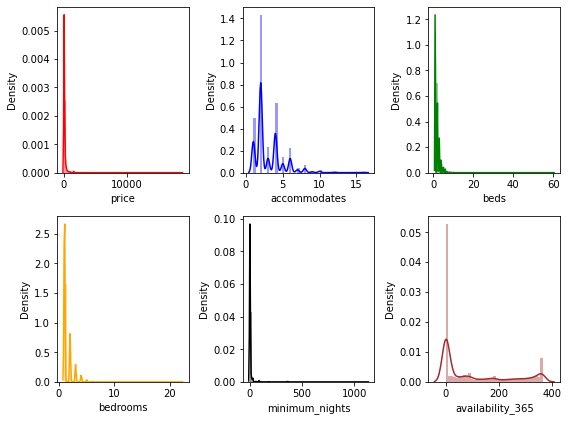

In [20]:
#density plot to observe distribution
sb.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sb.distplot(london2['price'],color= 'red')

subplot(2,3,2)
sb.distplot(london2['accommodates'],color = 'blue')

subplot(2,3,3)
sb.distplot(london2['beds'],color = 'green')

subplot(2,3,4)
sb.distplot(london2['bedrooms'],color = 'orange')

subplot(2,3,5)
sb.distplot(london2['minimum_nights'],color = 'black')

subplot(2,3,6)
sb.distplot(london2['availability_365'],color = 'brown')

plt.tight_layout()

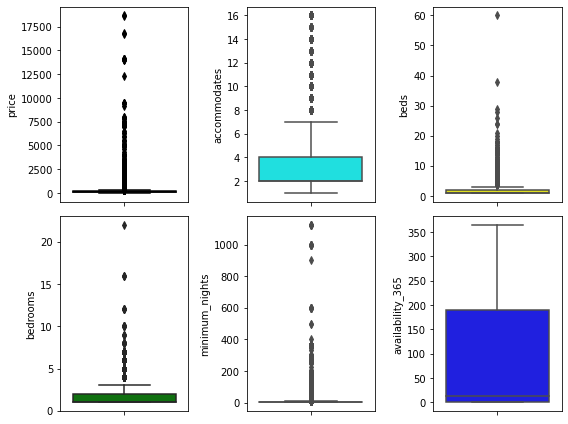

In [21]:
#boxplot to observe outliers
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sb.boxplot(y = london2['price'],color = 'black') 

subplot(2,3,2)
sb.boxplot(y = london2['accommodates'],color = 'cyan')

subplot(2,3,3)
sb.boxplot(y = london2['beds'],color = 'yellow')

subplot(2,3,4)
sb.boxplot(y = london2['bedrooms'],color = 'green')

subplot(2,3,5)
sb.boxplot(y = london2['minimum_nights'],color = 'red')

subplot(2,3,6)
sb.boxplot(y = london2['availability_365'],color = 'blue')

plt.tight_layout()
plt.draw()

In [22]:
#Calling the function to ouline the outliers
find_outliers(london2)

(                           Feature  Percentage of Outliers
 0                         latitude                3.113745
 1                        longitude                2.989196
 2                            price                7.528511
 3                   minimum_nights                8.718487
 4                number_of_reviews               12.150360
 5                reviews_per_month               10.970888
 6   calculated_host_listings_count               16.117947
 7                 availability_365                0.000000
 8                     accommodates                3.601441
 9                         bedrooms                3.900060
 10                            beds                8.122749,
 Int64Index([   12,    15,    43,    71,    80,    91,    94,   140,   142,
               154,
             ...
             66556, 66557, 66565, 66579, 66580, 66583, 66592, 66596, 66601,
             66615],
            dtype='int64', length=5413))

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


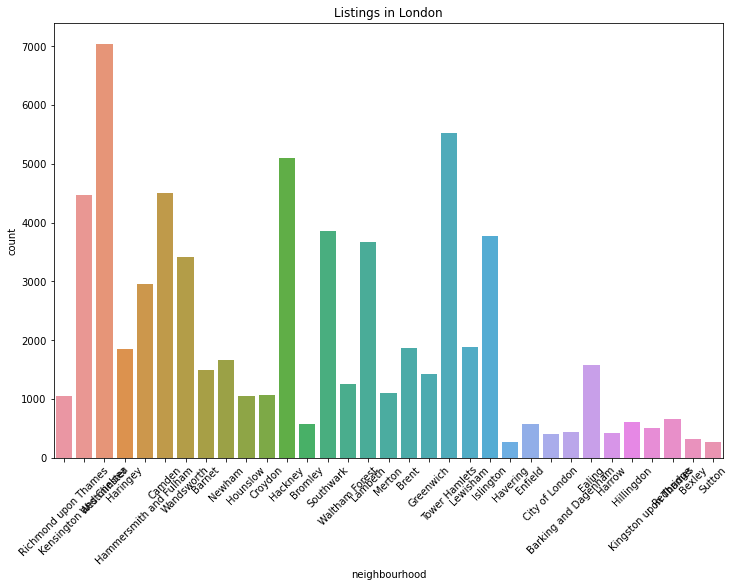

In [23]:
# neibourhood listings in london
title = 'Listings in London'
plt.figure(figsize=(12,8))
chart = sb.countplot(london2['neighbourhood'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title(title)
plt.ioff()

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


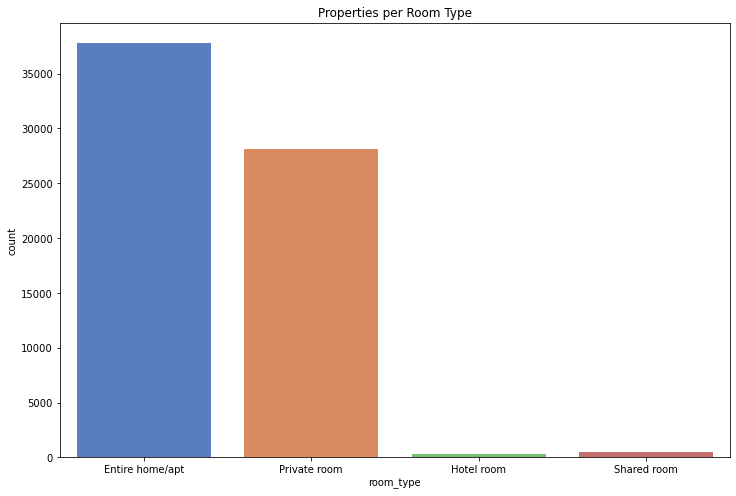

In [24]:
# room type of properties
title = 'Properties per Room Type'
plt.figure(figsize=(12,8))
sb.countplot(london2['room_type'])
plt.title(title)
plt.ioff()

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


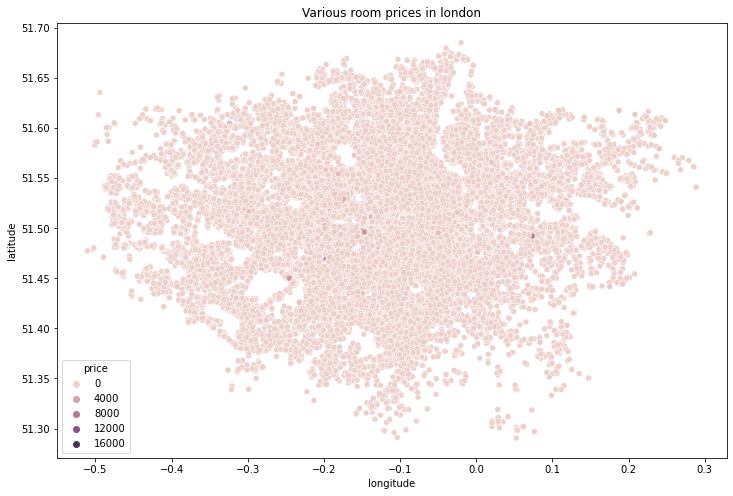

In [25]:
#scatterplot for various room prices in london
title = 'Various room prices in london'
plt.figure(figsize=(12,8))
sb.scatterplot(london2.longitude,london.latitude,hue=london.price).set_title(title)
plt.ioff()

/Users/payyavula/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


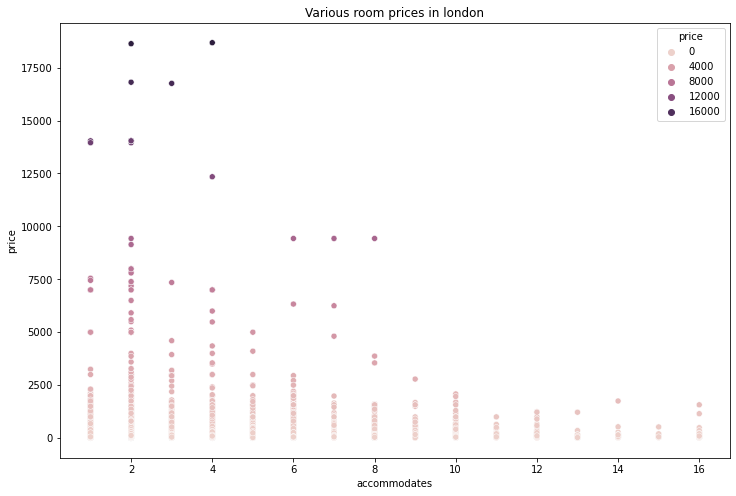

In [26]:
#scatterplot for various room prices in london
title = 'Various room prices in london'
plt.figure(figsize=(12,8))
sb.scatterplot(london2.accommodates,london.price,hue=london.price).set_title(title)
plt.ioff()

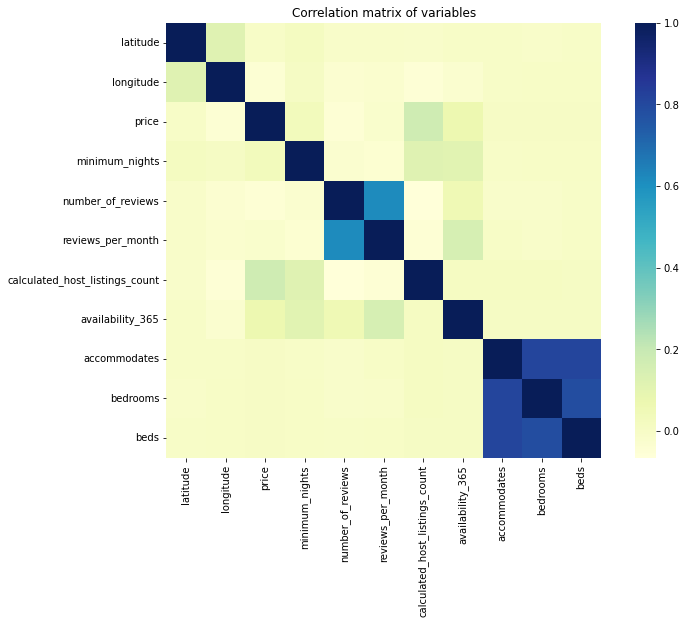

In [27]:
#correlation matrix
plt.figure(figsize=(12,8))
title = 'Correlation matrix of variables'
sb.heatmap(london2.corr(), square=True, cmap='YlGnBu')
plt.title(title)
plt.ioff()

In [28]:
london2.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,beds
0,Richmond upon Thames,51.48085,-0.28086,Entire home/apt,195,3,89,0.64,1,233,5.0,3.0,3.0
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,0.60,1,9,2.0,1.0,1.0
2,Westminster,51.52195,-0.14094,Entire home/apt,307,4,45,0.34,1,213,4.0,1.0,1.0
3,Haringey,51.58478,-0.16057,Private room,72,2,550,3.93,2,236,2.0,1.0,1.0
4,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,0.29,2,364,2.0,1.0,1.0


In [29]:
london_location_data = london2[["latitude", "longitude"]]

In [30]:
london_location_data.head()

,latitude,longitude
0,51.48085,-0.28086
1,51.48780,-0.16813
2,51.52195,-0.14094
3,51.58478,-0.16057
4,51.47935,-0.19743


In [31]:
#Importing the requred paackages for predictive modeling
from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn.preprocessing import normalize #For Normalizing
from sklearn import metrics # for calculating Silhouette score
#pip install plotly
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
from sklearn.preprocessing import LabelEncoder #For encoding the catigorical varibles
from sklearn.model_selection import train_test_split #For splitting the data
from sklearn.ensemble import RandomForestClassifier# for performing RandomForest classification
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score #for calculatinf r squared score
from sklearn.neighbors import KNeighborsClassifier #For performing the K-NN classification
from sklearn import preprocessing #For preprocessing the data
from sklearn.neighbors import KNeighborsRegressor #For performing the K-NN regression
from sklearn.preprocessing import StandardScaler #For stnadadizing the data

In [32]:
#setting the seed for repoducebility
rd.seed(1234)

Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


/var/folders/t5/kfl2q_d93wg9qz3m6_gr2_zh0000gn/T/ipykernel_3075/3828349417.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


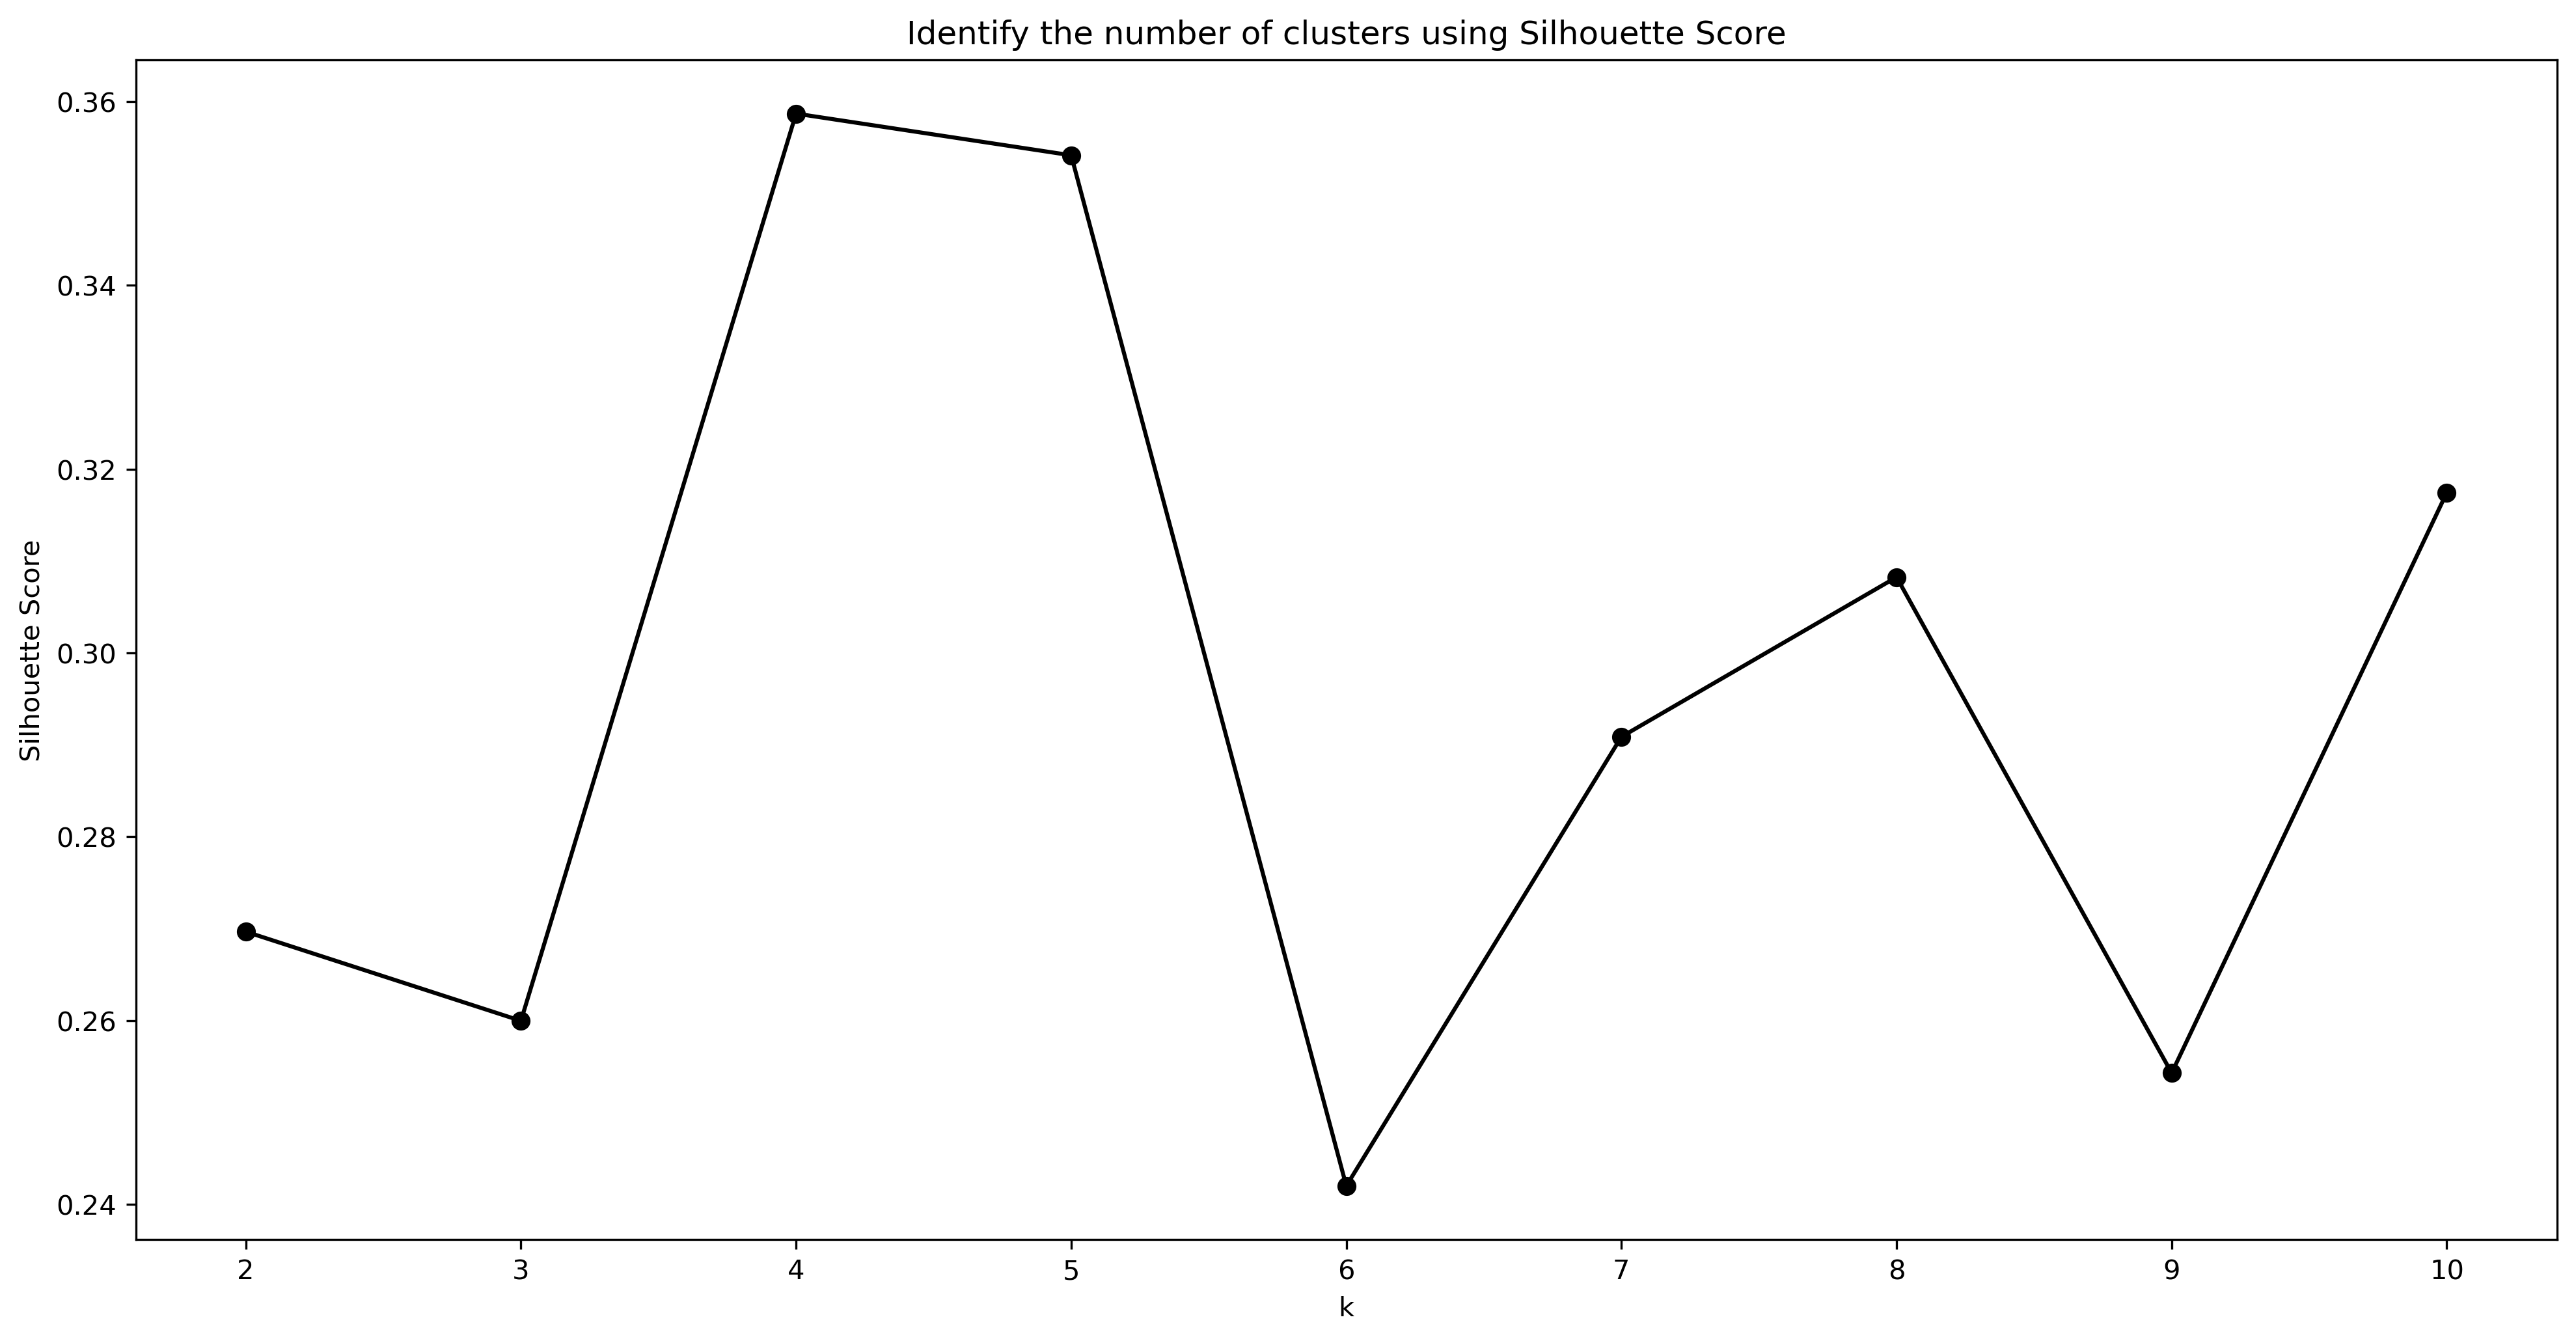

In [35]:
#Inspired from towardsdatascience.com (https://towardsdatascience.com/gmm-gaussian-mixture-models-how-to-successfully-use-it-to-cluster-your-data-891dc8ac058f)
# Create empty list to store the Silhouette Score
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = london_location_data.copy()

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    print("Iteration", k)


# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [34]:
#Inspired from towardsdatascience.com (https://towardsdatascience.com/gmm-gaussian-mixture-models-how-to-successfully-use-it-to-cluster-your-data-891dc8ac058f)
# Set the model and its parameters - 4 clusters
model4 = GaussianMixture(n_components=4, # this is the number of clusters
                         covariance_type='full', # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                         max_iter=100, # the number of EM iterations to perform. default=100
                         n_init=1, # the number of initializations to perform. default = 1
                         init_params='kmeans', # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                         verbose=0, # default 0, {0,1,2}
                         random_state=1 # for reproducibility
                        )

# Fit the model and predict labels
clust4 = model4.fit(X)
labels4 = model4.predict(X)


NameError: name 'X' is not defined

In [35]:
# Print model summary
print('*************** 4 Cluster Model ***************')
print('Means: ', clust4.means_)
print('Covariances: ', clust4.covariances_)
print('Converged: ', clust4.converged_)
print(' No. of Iterations: ', clust4.n_iter_)


*************** 4 Cluster Model ***************
Means:  [[ 5.14997396e+01 -1.79231790e-01]
 [ 5.15297580e+01 -8.35920630e-02]
 [ 5.14868057e+01 -2.99910824e-01]
 [ 5.14937122e+01 -8.73948077e-03]]
Covariances:  [[[ 0.00175633 -0.00055994]
  [-0.00055994  0.00167141]]

 [[ 0.00129363 -0.00015216]
  [-0.00015216  0.00188842]]

 [[ 0.0032942  -0.00104047]
  [-0.00104047  0.00639384]]

 [[ 0.00417551  0.00199006]
  [ 0.00199006  0.00784924]]]
Converged:  True
 No. of Iterations:  9


/var/folders/t5/kfl2q_d93wg9qz3m6_gr2_zh0000gn/T/ipykernel_3048/3052152541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_location_data['Clust4']=labels4


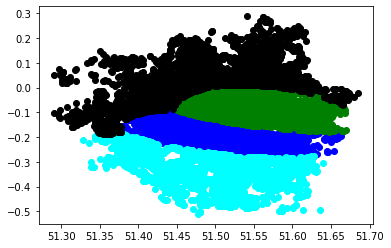

In [36]:
#Inspired from analytics vidya (https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/)
#Plotting the clustered data
london_location_data['Clust4']=labels4
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = london_location_data[london_location_data["Clust4"]==k]
    plt.scatter(data["latitude"],data["longitude"],c=color[k])
plt.show()

In [32]:
#Copying the data to know the neighbourhood involved in the each cluster 
london3 = london2.copy()

In [33]:
#Adding the cluster number 
london3['Cluster_number']=labels4

NameError: name 'labels4' is not defined

In [39]:
london3.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,beds,Cluster_number
0,Richmond upon Thames,51.48085,-0.28086,Entire home/apt,195,3,89,0.64,1,233,5.0,3.0,3.0,2
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,0.60,1,9,2.0,1.0,1.0,0
2,Westminster,51.52195,-0.14094,Entire home/apt,307,4,45,0.34,1,213,4.0,1.0,1.0,1
3,Haringey,51.58478,-0.16057,Private room,72,2,550,3.93,2,236,2.0,1.0,1.0,1
4,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,0.29,2,364,2.0,1.0,1.0,0


In [40]:
#neighbourhood involved in the each cluster 0
london3.query('Cluster_number == 0')["neighbourhood"].unique()

array(['Kensington and Chelsea', 'Hammersmith and Fulham', 'Camden',
       'Wandsworth', 'Barnet', 'Westminster', 'Hounslow', 'Merton',
       'Lambeth', 'Brent', 'Richmond upon Thames', 'Ealing', 'Croydon',
       'Harrow', 'Southwark', 'Sutton'], dtype=object)

In [41]:
#neighbourhood involved in the each cluster 1
london3.query('Cluster_number == 1')["neighbourhood"].unique()

array(['Westminster', 'Haringey', 'Camden', 'Hackney', 'Southwark',
       'Waltham Forest', 'Barnet', 'Lambeth', 'Tower Hamlets',
       'Islington', 'Enfield', 'City of London', 'Newham', 'Lewisham',
       'Greenwich'], dtype=object)

In [42]:
#neighbourhood involved in the each cluster 2
london3.query('Cluster_number == 2')["neighbourhood"].unique()

array(['Richmond upon Thames', 'Hounslow', 'Merton', 'Ealing', 'Harrow',
       'Hillingdon', 'Brent', 'Kingston upon Thames', 'Wandsworth',
       'Sutton', 'Barnet'], dtype=object)

In [43]:
#neighbourhood involved in the each cluster 3
london3.query('Cluster_number == 3')["neighbourhood"].unique()

array(['Newham', 'Croydon', 'Bromley', 'Greenwich', 'Waltham Forest',
       'Lewisham', 'Havering', 'Barking and Dagenham', 'Redbridge',
       'Southwark', 'Enfield', 'Bexley', 'Lambeth', 'Sutton'],
      dtype=object)

In [44]:
london3_new = london3[["price", "Cluster_number" ]]

In [45]:
#Predicting the price based on the clustered locations isong radom forest classification model
model, model_accuracy = find_random_forest_classifier_model_Accuracy(london3_new, "price")
model_accuracy

0.03391356542617047

In [46]:
#Copying the data into new dataframe to drop the location data
london4 = london2.copy()
london4.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,beds
0,Richmond upon Thames,51.48085,-0.28086,Entire home/apt,195,3,89,0.64,1,233,5.0,3.0,3.0
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,0.60,1,9,2.0,1.0,1.0
2,Westminster,51.52195,-0.14094,Entire home/apt,307,4,45,0.34,1,213,4.0,1.0,1.0
3,Haringey,51.58478,-0.16057,Private room,72,2,550,3.93,2,236,2.0,1.0,1.0
4,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,0.29,2,364,2.0,1.0,1.0


In [47]:
#Dropping the lattitude logitude and neighbourhood features as they are not significatn to our analysis
london4.drop(['neighbourhood',"latitude", "longitude",], axis=1, inplace=True)

In [48]:
#Validataing the features
london4.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,beds
0,Entire home/apt,195,3,89,0.64,1,233,5.0,3.0,3.0
1,Entire home/apt,75,3,89,0.60,1,9,2.0,1.0,1.0
2,Entire home/apt,307,4,45,0.34,1,213,4.0,1.0,1.0
3,Private room,72,2,550,3.93,2,236,2.0,1.0,1.0
4,Private room,150,3,0,0.29,2,364,2.0,1.0,1.0


In [49]:
#Encoding the room type
labelencoder = LabelEncoder()
london4['room_type'] = labelencoder.fit_transform(london4['room_type'])

In [50]:
#validating the data
london4.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,beds
0,0,195,3,89,0.64,1,233,5.0,3.0,3.0
1,0,75,3,89,0.60,1,9,2.0,1.0,1.0
2,0,307,4,45,0.34,1,213,4.0,1.0,1.0
3,2,72,2,550,3.93,2,236,2.0,1.0,1.0
4,2,150,3,0,0.29,2,364,2.0,1.0,1.0


In [1]:
#Predicting the price based on other 9 features using radom forest classification model
model, model_accuracy = find_random_forest_classifier_model_Accuracy(london4, "price")
model_accuracy

NameError: name 'find_random_forest_classifier_model_Accuracy' is not defined

Text(0.5, 0, 'Random Forest Feature Importance')

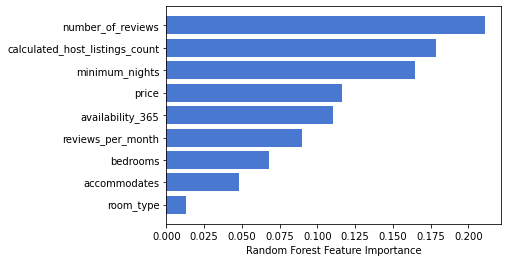

In [52]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(london4.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [53]:
london4_imp = london4[["price","number_of_reviews", "minimum_nights", "availability_365", "calculated_host_listings_count"]]

In [ ]:
#Predicting the price based top 5 important features from  radom forest classification model
model, model_accuracy = find_random_forest_classifier_model_Accuracy(london4_imp, "price")
model_accuracy

In [ ]:
# create a list of conditions
conditions = [
    (london4['price'] < 100),
    (london4['price'] >= 100) & (london4['price'] < 250),
     (london4['price'] >= 250) & (london4['price'] < 600),
    (london4['price'] >= 600) ]

# create a list of the values we want to assign for each condition
values = ['economic', 'low-mid', 'high-mid','high']

# create a new column and use np.select to assign values to it using our lists as arguments
london4['price_range'] = np.select(conditions, values)

In [ ]:
#Visulalizing the price range
london4['price_range'].value_counts()

In [ ]:
#Finding the head data
london4.head()

In [ ]:
#With the price feature in the classification
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
london4['price_range'] = labelencoder.fit_transform(london4['price_range']) #Ecoding the price range

In [ ]:
# predicting the the price range based on the 10 features inclusing price
find_n_neighbors_value_with_highest_accuracy(london4)

In [ ]:
# predicting the the price range based on the 9 features excluding price
london4_without_price = london4.copy()
london4_without_price.drop(['price',], axis=1, inplace=True)

In [ ]:
#Calling the function to find predicted values accuracy
find_n_neighbors_value_with_highest_accuracy(london4_without_price)

In [ ]:
#predicting the price range with random forest classification
model, accuracy = find_random_forest_classifier_model_Accuracy(london4_without_price)
accuracy

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(london4_without_price.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
#Extracting the first five important features
london5 = london4[["room_type","availability_365", "reviews_per_month", "calculated_host_listings_count", "number_of_reviews", "price_range"]]

In [ ]:
#Predicting the price range based on the first five important features using K-NN classification
#Calling the function to find predicted values accuracy
find_n_neighbors_value_with_highest_accuracy(london5)

In [ ]:
find_outliers(london4)